
# N170 Load and Visualize Data

This example demonstrates loading, organizing, and visualizing ERP response data from the visual N170 experiment. 

Images of faces and houses are shown in a rapid serial visual presentation (RSVP) stream.

The data used is the first subject and first session of the one of the eeg-expy N170 example datasets, recorded using the InteraXon MUSE EEG headset (2016 model). 
This session consists of six two-minute blocks of continuous recording.  

We first use the `fetch_datasets` to obtain a list of filenames. If these files are not already present 
in the specified data directory, they will be quickly downloaded from the cloud. 

After loading the data, we place it in an MNE `Epochs` object, and obtain the trial-averaged response. 

The final figure plotted at the end shows the N170 response ERP waveform. 


## Setup



In [1]:
# Some standard pythonic imports
import os
from matplotlib import pyplot as plt 
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

# MNE functions
from mne import Epochs,find_events

# EEG-Notebooks functions
from eegnb.analysis.analysis_utils import load_data,plot_conditions
from eegnb.datasets import fetch_dataset

## Load Data

We will use the eeg-expy N170 example dataset

Note that if you are running this locally, the following cell will download
the example dataset, if you do not already have it.




In [2]:
eegnb_data_path = os.path.join(os.path.expanduser('~/'),'.eegnb', 'data')    
n170_data_path = os.path.join(eegnb_data_path, 'visual-N170', 'eegnb_examples')

# If dataset hasn't been downloaded yet, download it 
if not os.path.isdir(n170_data_path):
    fetch_dataset(data_dir=eegnb_data_path, experiment='visual-N170', site='eegnb_examples');

subject = 1
session = 1
raw = load_data(subject,session,
                experiment='visual-N170', site='eegnb_examples', device_name='muse2016_bfn',
                data_dir = eegnb_data_path)



Loading these files: 

C:\Users\pavit\.eegnb\data\visual-N170\eegnb_examples\muse2016_bfn\subject0001\session001\recording_2022-03-20-22.33.14.csv

C:\Users\pavit\.eegnb\data\visual-N170\eegnb_examples\muse2016_bfn\subject0001\session001\recording_2022-03-20-22.42.26.csv

C:\Users\pavit\.eegnb\data\visual-N170\eegnb_examples\muse2016_bfn\subject0001\session001\recording_2022-03-20-22.51.41.csv

C:\Users\pavit\.eegnb\data\visual-N170\eegnb_examples\muse2016_bfn\subject0001\session001\recording_2022-03-20-23.02.59.csv

C:\Users\pavit\.eegnb\data\visual-N170\eegnb_examples\muse2016_bfn\subject0001\session001\recording_2022-03-20-23.09.14.csv

C:\Users\pavit\.eegnb\data\visual-N170\eegnb_examples\muse2016_bfn\subject0001\session001\recording_2022-03-20-23.17.10.csv

C:\Users\pavit\.eegnb\data\visual-N170\eegnb_examples\muse2016_bfn\subject0001\session001\recording_2022-03-20-23.29.19.csv

C:\Users\pavit\.eegnb\data\visual-N170\eegnb_examples\muse2016_bfn\subject0001\session001\recording_

## Visualize the power spectrum



NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


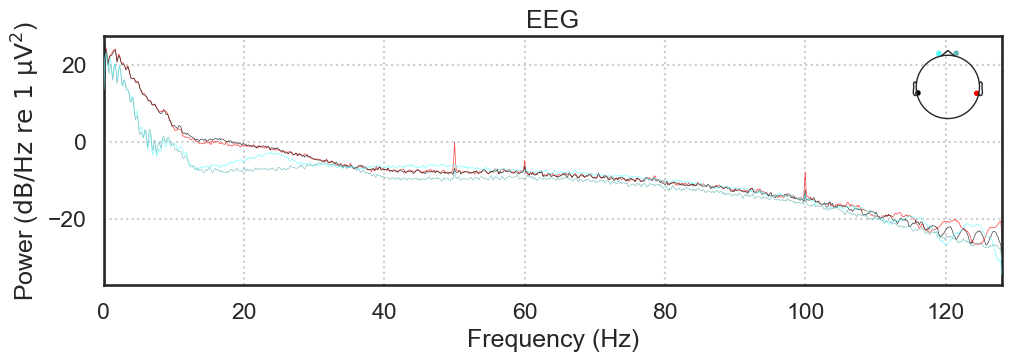

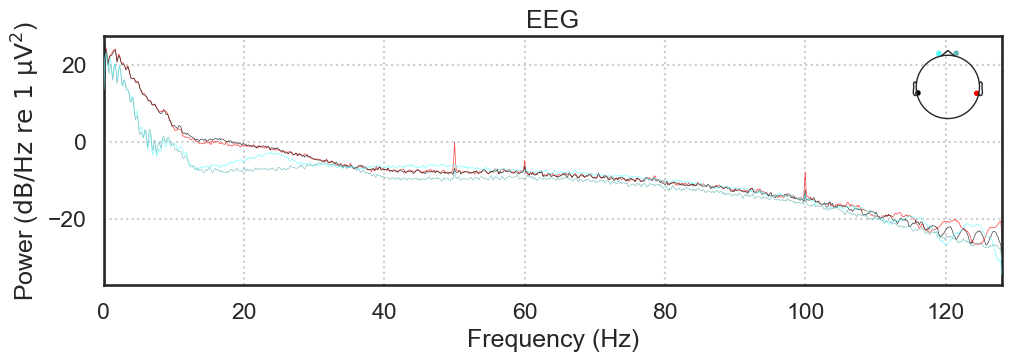

In [3]:
raw.plot_psd()

## Filtering



In [4]:
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30);

Filtering raw data in 10 contiguous segments
Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


## Epoching



In [5]:
# Create an array containing the timestamps and type of each stimulus (i.e. face or house)
events = find_events(raw)
event_id = {'House': 1, 'Face': 2}

# Create an MNE Epochs object representing all the epochs around stimulus presentation
epochs = Epochs(raw, events=events, event_id=event_id, 
                tmin=-0.1, tmax=0.6, baseline=None,
                reject={'eeg': 5e-5}, preload=True, 
                verbose=False, picks=[0,1,2,3])
print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)
epochs

Finding events on: stim
3740 events found on stim channel stim
Event IDs: [1 2]
sample drop %:  9.919786096256688


<Epochs | 3369 events (all good), -0.102 – 0.602 s (baseline off), ~18.6 MiB, data loaded,
 'House': 1667
 'Face': 1702>

## Epoch average



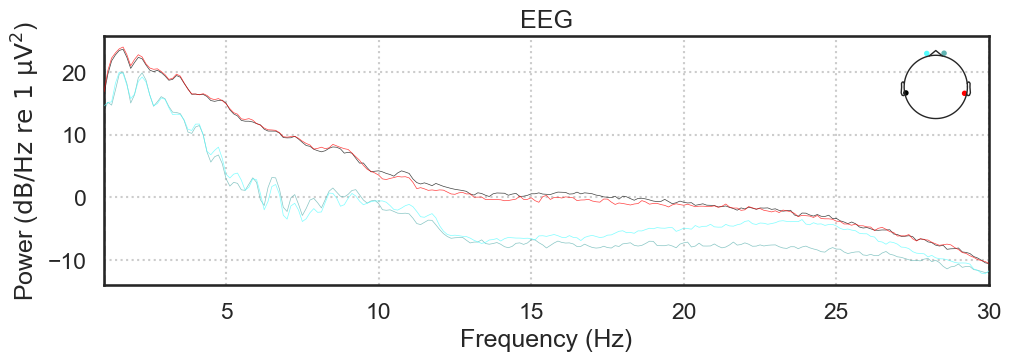

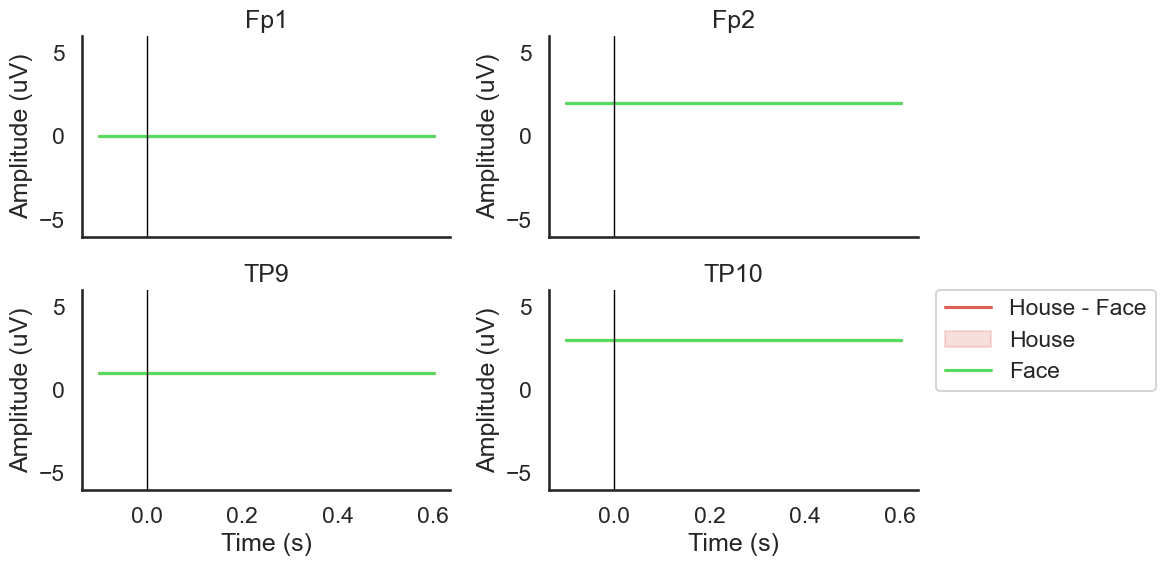

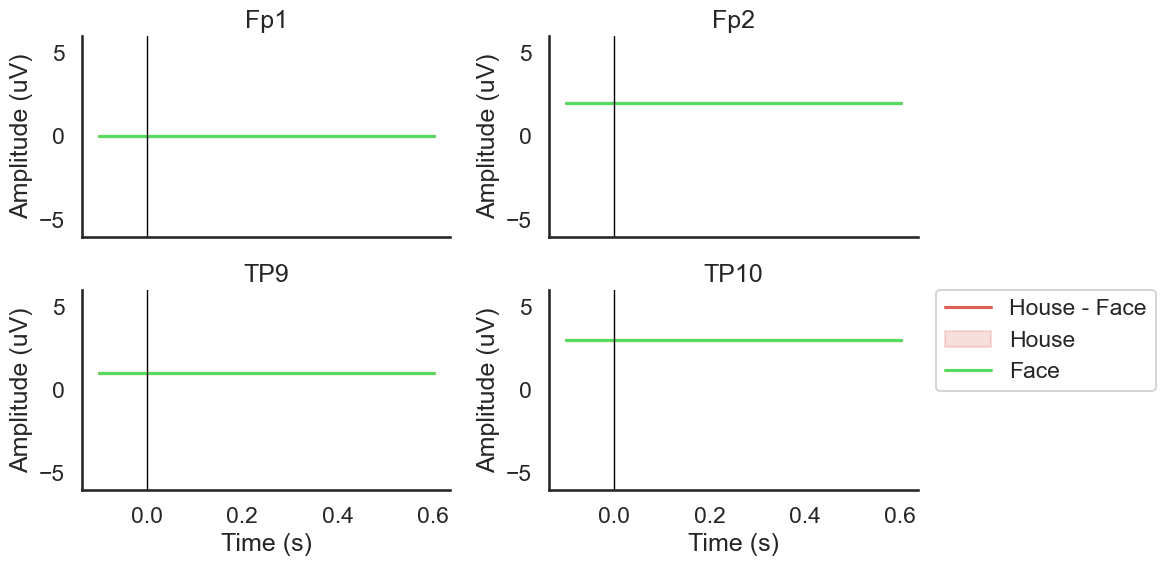

In [7]:
conditions = OrderedDict()
#conditions['House'] = [1]
#conditions['Face'] = [2]
conditions['House'] = ['House']
conditions['Face'] = ['Face']
diffwav = ('Face', 'House')

fig, ax = plot_conditions(epochs, conditions=conditions, 
                          ci=97.5, n_boot=1000, title='',
                          diff_waveform=diffwav,
                          channel_order=[1,0,2,3]) 
# reordering of epochs.ch_names according to [[0,2],[1,3]] of subplot axes

# Manually adjust the ylims
#for i in [0,2]: ax[i].set_ylim([-0.5e6,0.5e6])
#for i in [1,3]: ax[i].set_ylim([-1.5e6,2.5e6])
plt.tight_layout()
plt.show()